<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


<h1><center>Final Assignment : Project: Medical Insurance Cost Prediction</center></h1>


# 1. Objective of the Analysis

The primary objective of this analysis is to identify and quantify the key factors that drive individual medical insurance costs. By leveraging both statistical modeling and supervised machine learning, we aim to provide a comprehensive view of how demographic and lifestyle attributes influence insurance premiums.

This analysis provides actionable insights for three main stakeholders:

Insurance Providers: To refine pricing strategies and actuarial models by identifying the high-impact variables (such as the interaction between smoking and BMI).

Policy Makers: To understand the broader financial and public health impact of lifestyle choices, supporting data-driven health initiatives.

Individuals: To provide a predictive tool that estimates potential future healthcare costs based on their personal health profile.

#2. Data Summary

This dataset contains 1,338 records of historical insurance data. It is a "clean" dataset with no missing values, which allows us to focus on modeling and feature importance.

Data Dictionary

<table style="width:100%; border: 1px solid #ccc; border-collapse: collapse;">
<thead>
<tr style="background-color: #f2f2f2;">
<th style="border: 1px solid #ccc; padding: 8px; text-align: left;">Variable</th>
<th style="border: 1px solid #ccc; padding: 8px; text-align: left;">Type</th>
<th style="border: 1px solid #ccc; padding: 8px; text-align: left;">Description</th>
</tr>
</thead>
<tbody>
<tr>
<td style="border: 1px solid #ccc; padding: 8px;"><b>age</b></td>
<td style="border: 1px solid #ccc; padding: 8px;">Numerical</td>
<td style="border: 1px solid #ccc; padding: 8px;">Age of the primary beneficiary (18-64).</td>
</tr>
<tr>
<td style="border: 1px solid #ccc; padding: 8px;"><b>sex</b></td>
<td style="border: 1px solid #ccc; padding: 8px;">Categorical</td>
<td style="border: 1px solid #ccc; padding: 8px;">Gender of the insurance contractor (female, male).</td>
</tr>
<tr>
<td style="border: 1px solid #ccc; padding: 8px;"><b>bmi</b></td>
<td style="border: 1px solid #ccc; padding: 8px;">Numerical</td>
<td style="border: 1px solid #ccc; padding: 8px;">Body Mass Index (kg/m²), measuring body weight relative to height.</td>
</tr>
<tr>
<td style="border: 1px solid #ccc; padding: 8px;"><b>children</b></td>
<td style="border: 1px solid #ccc; padding: 8px;">Numerical</td>
<td style="border: 1px solid #ccc; padding: 8px;">Number of children/dependents covered by the health insurance.</td>
</tr>
<tr>
<td style="border: 1px solid #ccc; padding: 8px;"><b>smoker</b></td>
<td style="border: 1px solid #ccc; padding: 8px;">Categorical</td>
<td style="border: 1px solid #ccc; padding: 8px;">Whether the beneficiary is a regular smoker (yes, no).</td>
</tr>
<tr>
<td style="border: 1px solid #ccc; padding: 8px;"><b>region</b></td>
<td style="border: 1px solid #ccc; padding: 8px;">Categorical</td>
<td style="border: 1px solid #ccc; padding: 8px;">Residential area in the US (northeast, southeast, southwest, northwest).</td>
</tr>
<tr>
<td style="border: 1px solid #ccc; padding: 8px;"><b>charges</b></td>
<td style="border: 1px solid #ccc; padding: 8px;"><b>Target</b></td>
<td style="border: 1px solid #ccc; padding: 8px;"><b>(Outcome Variable)</b> Individual medical costs billed by health insurance.</td>
</tr>
</tbody>
</table>

# 3. Data Acquisition

In this step, we use the pandas library to import the dataset directly from a public repository. This ensures the analysis is reproducible and uses the most standardized version of the medical insurance data.

In [5]:
import pandas as pd

# Define the URL of the raw CSV file (Clean string for Python)
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"

# Load the dataset into a pandas DataFrame
df = pd.read_csv(url)

# Display the first 5 rows to confirm it loaded correctly
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# Check for null values and data types
print("Dataset Info:")
df.info()

# Summary statistics for numerical variables
print("\nStatistical Summary:")
display(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Statistical Summary:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Initial Data Verification

After loading, we verify that the data structure matches our expectations:

Total Records: 1,338 rows.

Missing Values: Checking for any null entries that might require cleaning.

Statistical Range: Inspecting the minimum and maximum values for age, BMI, and charges.

# 4 Exploratory Data Analysis

Exploratory Data Analysis is a crucial step in understanding the distribution of our variables and the relationships between them. In this section, we focus on identifying the strongest predictors of medical charges.


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 4.1 Descriptive Statistics

Before visualizing, we look at the raw numbers to understand the central tendency and spread of our numerical variables.

In [15]:
# Display descriptive statistics for numerical columns
print("Summary Statistics for Numerical Variables:")
display(df.describe())

# Check the distribution of categorical variables
print("\nCounts for Categorical Variables:")
print(df['smoker'].value_counts(),'\n')
print(df['region'].value_counts())

Summary Statistics for Numerical Variables:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



Counts for Categorical Variables:
smoker
no     1064
yes     274
Name: count, dtype: int64 

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


## 4.2 Analysis of the Target Variable (Charges)

Our target variable is charges. Understanding its distribution is vital for linear regression, as the model assumes a certain level of normality in errors.

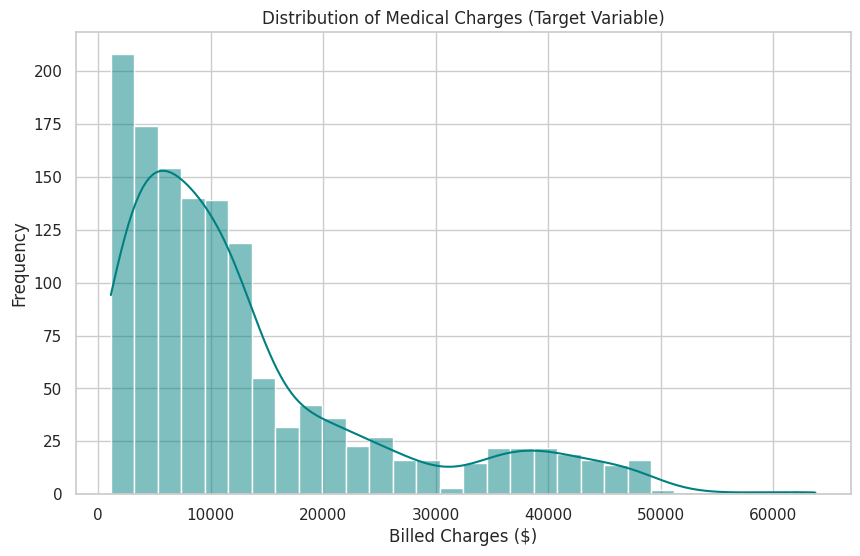

In [16]:
# Set visual style
sns.set(style="whitegrid")

# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, color='teal')
plt.title('Distribution of Medical Charges (Target Variable)')
plt.xlabel('Billed Charges ($)')
plt.ylabel('Frequency')
plt.show()

Observation: The target variable is heavily "right-skewed." Most policyholders incur charges under 15,000, while a smaller group incurs significantly higher costs, reaching up to 60,000+. This suggests the presence of outliers or specific subgroups (like smokers) that drive up the average.

## 4.3 Analysis of Features (Predictors) and Relationships

To understand the dataset holistically, we look at the interactions between all variables and quantify their linear relationships.

**Pairplot**

A pairplot allows us to see the distribution of each variable and its relationship with every other variable in one grid. We color the data by smoker to highlight its dominant influence.

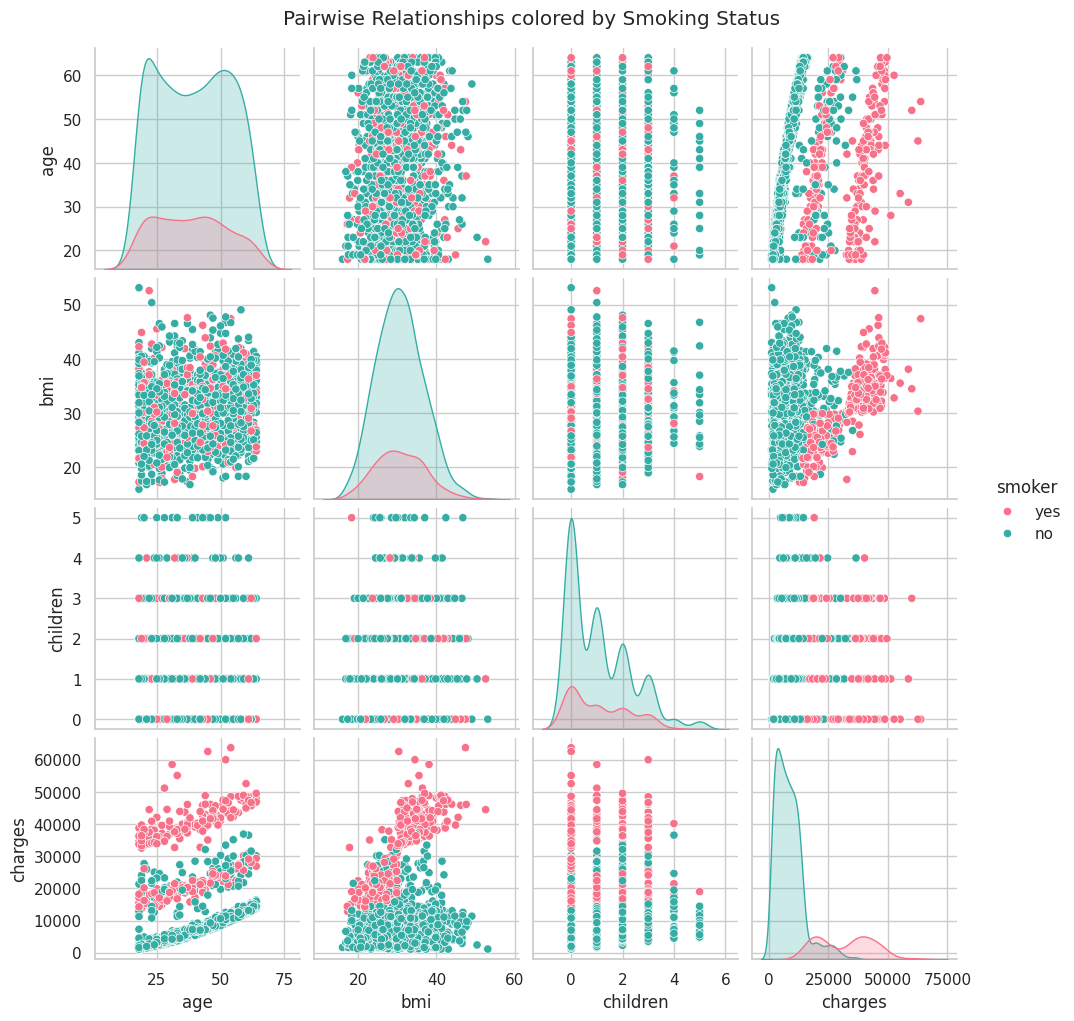

In [17]:
# Pairplot to see all relationships at once
sns.pairplot(df, hue='smoker', palette='husl', diag_kind='kde')
plt.suptitle('Pairwise Relationships colored by Smoking Status', y=1.02)
plt.show()

The Pairplot provides a comprehensive view of our data structure. The diagonal plots show the distribution of each variable for smokers (red/pink) versus non-smokers (green). The off-diagonal scatter plots show the interaction between pairs of variables. Notice how the "smoker" hue creates two distinct clusters in almost every scatter plot involving charges. This confirms that smoking is not just a predictor but a fundamental "divider" of the data.

**Correlation Heatmap**

To run a heatmap, we first need to convert our categorical text into numbers (encoding). This allows us to calculate the correlation coefficient ($r$) for every feature against the target.

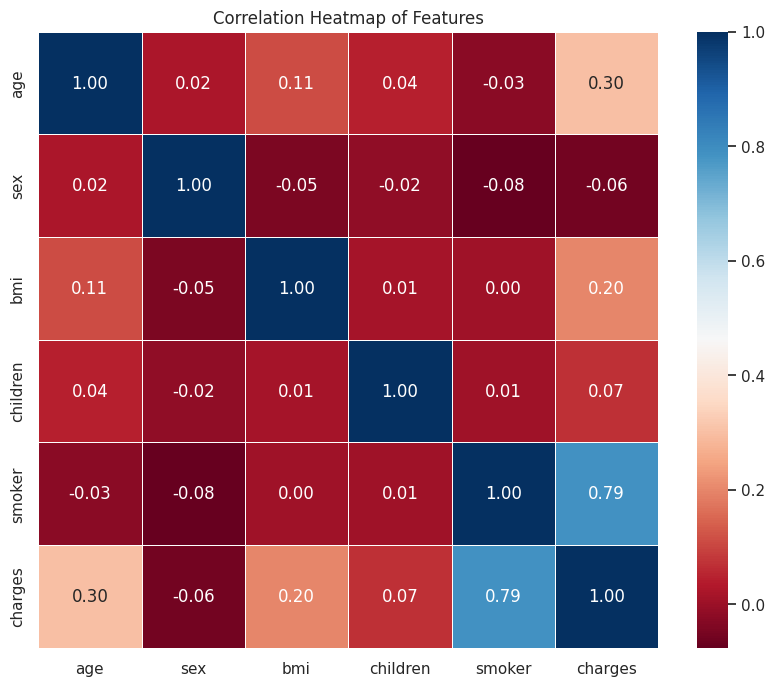

In [18]:
# Convert categorical variables to numerical for correlation analysis
df_encoded = df.copy()
df_encoded['smoker'] = df_encoded['smoker'].map({'yes': 1, 'no': 0})
df_encoded['sex'] = df_encoded['sex'].map({'female': 1, 'male': 0})

# Calculate correlation matrix (numerical columns only)
corr_matrix = df_encoded.select_dtypes(include=['number']).corr()

# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

The Correlation Heatmap provides a numerical summary of the linear relationships between variables. The values range from -1 to 1, where 1 indicates a perfect positive correlation and 0 indicates no linear relationship.

Key takeaways from the heatmap:

- Smoker vs. Charges (0.79): This is the strongest correlation in the dataset. It indicates that smoking status is the most significant predictor of medical costs.

- Age vs. Charges (0.30): There is a moderate positive correlation, confirming that as age increases, medical charges tend to rise.

- BMI vs. Charges (0.20): There is a weak to moderate positive correlation between BMI and costs.

- Low Multicollinearity: The correlations between independent variables (e.g., age vs. BMI) are very low (near 0.1), which is excellent for linear regression as it means the features are providing unique information to the model.

## 4.4 Detailed Feature Exploration

We further examine individual features to see how they behave independently.

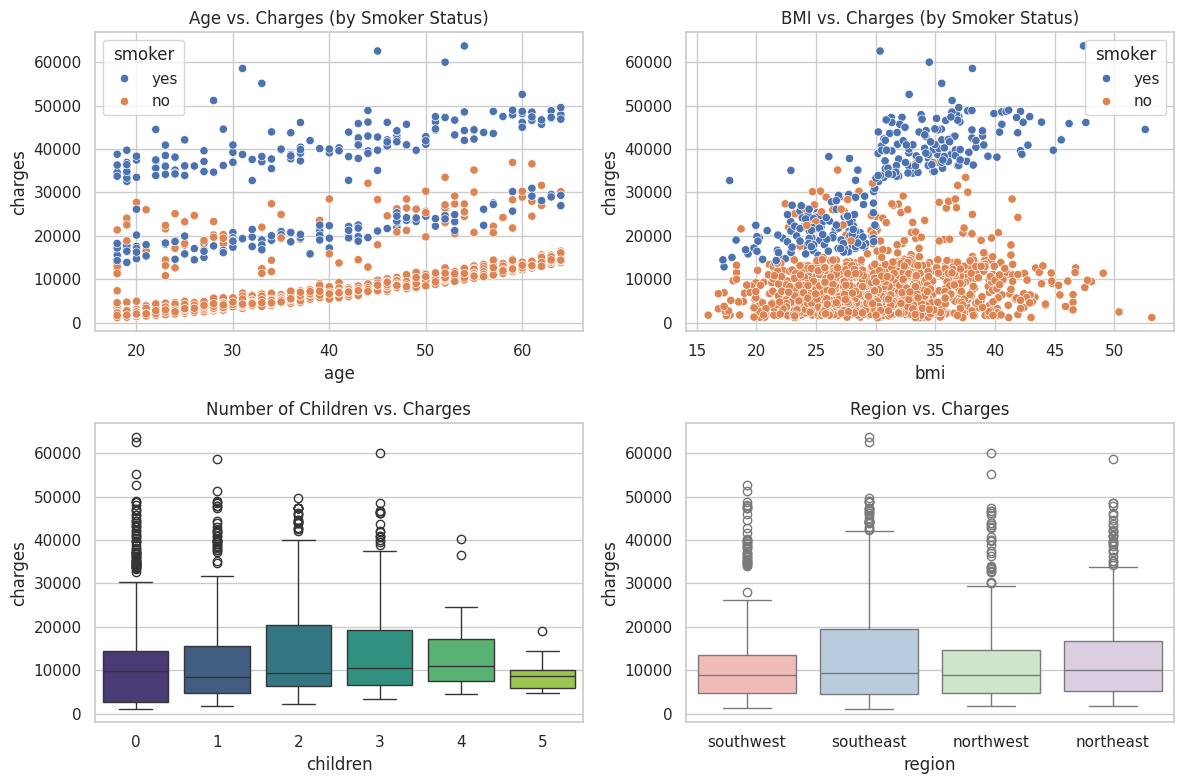

In [20]:
# Impact of specific predictors on Charges
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Age vs Charges
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, ax=axes[0,0])
axes[0,0].set_title('Age vs. Charges (by Smoker Status)')

# BMI vs Charges
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, ax=axes[0,1])
axes[0,1].set_title('BMI vs. Charges (by Smoker Status)')

# Children vs Charges
sns.boxplot(x='children', y='charges', data=df, ax=axes[1,0], palette='viridis')
axes[1,0].set_title('Number of Children vs. Charges')

# Region vs Charges
sns.boxplot(x='region', y='charges', data=df, ax=axes[1,1], palette='Pastel1')
axes[1,1].set_title('Region vs. Charges')

plt.tight_layout()
plt.show()

Interpretation of Feature Exploration:

Age vs. Charges: We observe three distinct "strata" or bands. In each band, costs increase linearly with age. The lowest band consists almost entirely of non-smokers, while the highest band is dominated by smokers with higher BMIs.

BMI vs. Charges: This plot reveals a critical interaction. For non-smokers, charges are relatively flat regardless of BMI. However, for smokers, there is a sharp "elbow" at a BMI of 30, where charges jump significantly, indicating that the combination of smoking and obesity is particularly costly.

Children: The boxplot shows that while the median charge doesn't fluctuate wildly, there is a slight upward trend in cost as the number of dependents increases, likely due to higher healthcare utilization for larger families.

Region: The distribution of charges is remarkably consistent across the four US regions. While the Southeast shows a slightly higher volume of high-cost outliers, geographic location appears to be a secondary predictor compared to lifestyle choices.

## 4.5 Summary of EDA Findings

- Dominance of Lifestyle Factors: Smoking status is the single most impactful predictor. It not only raises the baseline cost but also amplifies the effects of other variables like BMI.

- Non-Linear Interactions: While we are building a linear regression, the "bands" in the age plot and the BMI-smoker interaction suggest that the relationship between features and cost is complex and layered.

- Data Quality & Distribution: The target variable charges is right-skewed, which may affect the residuals of a standard linear regression. This suggests that a log-transformation or a more robust model might be necessary.

- Predictor Independence: Low correlation between independent variables (age, bmi, children) confirms that our features are distinct, reducing the risk of multicollinearity in our final model.

# 5. Model Training

In [24]:
import numpy as np

## 5.1 Data Preparation & Feature Engineering

To ensure a robust analysis, we will prepare our data for two different approaches: Statistical Regression (OLS) for interpretability and Machine Learning (ML) for predictive performance. Both approaches require us to convert categorical text data into a numerical format through encoding.

Encoding Strategy

Binary Features: For variables like sex and smoker, we convert them into 0 and 1.

Multi-class Features: For region, we use One-Hot Encoding. To avoid the "dummy variable trap" (multicollinearity), we drop one category, which then serves as the reference baseline for our regression.

### Path A: Statistical Regression (OLS)

For OLS, we keep the numerical features on their original scale. This allows us to interpret the model coefficients directly in terms of dollars or percentages. We apply the Log Transformation to the target to satisfy the normality assumption of linear regression and perform categorical encoding.

In [25]:
# 1. Start with the raw dataframe
df_ols = df.copy()

# 2. Encoding: Binary for sex/smoker, One-Hot for region
# Using drop_first=True is critical for OLS to ensure a baseline for comparison
# We add .astype(int) to convert boolean True/False into numerical 1/0
df_ols = pd.get_dummies(df_ols, columns=['sex', 'smoker', 'region'], drop_first=True).astype(int)

# 3. Target Transformation: Log transform to handle skewness
# Note: We use the original df for the target to ensure we don't 'astype(int)' the charges
df_ols['log_charges'] = np.log1p(df['charges'])

# 4. Drop the original charges column if it persisted (it shouldn't be in df_ols yet)
if 'charges' in df_ols.columns:
    df_ols = df_ols.drop('charges', axis=1)

print("OLS Data Prepared (Categories as 0/1 integers, Original Scales kept):")
display(df_ols.head())

OLS Data Prepared (Categories as 0/1 integers, Original Scales kept):


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,log_charges
0,19,27,0,0,1,0,0,1,9.734236
1,18,33,1,1,0,0,1,0,7.453882
2,28,33,3,1,0,0,1,0,8.400763
3,33,22,0,1,0,1,0,0,9.998137
4,32,28,0,1,0,1,0,0,8.260455


### Path B: Machine Learning (ML)

For ML algorithms (especially those using gradient descent or distance metrics), we must scale our features after encoding. We will use StandardScaler to ensure all predictors have a mean of 0 and standard deviation of 1.

In [27]:
from sklearn.preprocessing import StandardScaler

# 1. Start with the encoded OLS dataframe
# This already contains the categorical variables as 0/1 integers
df_ml = df_ols.copy()

# 2. Scaling only the continuous Numerical Features (X)
feature_scaler = StandardScaler()
num_features = ['age', 'bmi', 'children']
df_ml[num_features] = feature_scaler.fit_transform(df_ml[num_features])

# 3. Scaling the Target (y) using a separate scaler object
target_scaler = StandardScaler()
df_ml['scaled_log_charges'] = target_scaler.fit_transform(df_ml[['log_charges']])

# Previewing a mix of scaled numerical and encoded categorical features
print("ML Data Prepared (Scaled continuous features + Encoded categorical features):")
display(df_ml.head())

ML Data Prepared (Scaled continuous features + Encoded categorical features):


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,log_charges,scaled_log_charges
0,-1.438764,-0.518122,-0.908614,0,1,0,0,1,9.734236,0.691385
1,-1.509965,0.462657,-0.078767,1,0,0,1,0,7.453882,-1.789861
2,-0.797954,0.462657,1.580926,1,0,0,1,0,8.400763,-0.759562
3,-0.441948,-1.335438,-0.908614,1,0,1,0,0,9.998137,0.978536
4,-0.513149,-0.354659,-0.908614,1,0,1,0,0,8.260455,-0.912231


Train-Test Split (ML Path)

We will now split the scaled ML data. The feature matrix ($X$) will include both the scaled numerical predictors and the encoded categorical binary predictors.

In [28]:
from sklearn.model_selection import train_test_split

# Define Features (X) and Target (y) for the ML model
# X includes: scaled age, scaled bmi, scaled children, and encoded 0/1 categories
X = df_ml.drop(['log_charges', 'scaled_log_charges'], axis=1)
y = df_ml['scaled_log_charges']

# Perform the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"ML Training set: {X_train.shape[0]} samples")
print(f"ML Testing set: {X_test.shape[0]} samples")
print("\nFinal feature list for ML training:")
print(X.columns.tolist())

ML Training set: 1070 samples
ML Testing set: 268 samples

Final feature list for ML training:
['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']


## 5.2 Statistical Modeling with OLS (Inference)

To understand the specific impact of each factor on medical insurance costs, we use Ordinary Least Squares (OLS) regression. Unlike basic machine learning models that focus solely on prediction, OLS provides statistical evidence (p-values and coefficients) to explain why costs vary.

Running OLS with Heteroskedasticity-Robust Standard Errors (HAC)

Because medical data often exhibits "Heteroskedasticity" (where the variance of errors is not constant, such as costs being more volatile for smokers), we use HAC (Heteroskedasticity and Autocorrelation Consistent) robust standard errors. This ensures our p-values are reliable and our conclusions are statistically sound.

In [29]:
import statsmodels.api as sm

# 1. Define Features (X) and Target (y) using the OLS dataset
# We use the original scales for X to make coefficients interpretable
X_ols = df_ols.drop('log_charges', axis=1)
y_ols = df_ols['log_charges']

# 2. Add a constant (Intercept) to the model
X_ols = sm.add_constant(X_ols)

# 3. Fit the OLS model
model = sm.OLS(y_ols, X_ols)

# 4. Use 'HC3' or 'HAC' to handle heteroskedasticity
# cov_type='HC3' is a robust estimator highly recommended for smaller datasets
results = model.fit(cov_type='HC3')

# 5. Display the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     408.4
Date:                Fri, 23 Jan 2026   Prob (F-statistic):               0.00
Time:                        06:17:42   Log-Likelihood:                -808.04
No. Observations:                1338   AIC:                             1634.
Df Residuals:                    1329   BIC:                             1681.
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.0366      0.069  

**Interpretation of Analysis Results**

Based on the regression results for this specific dataset, we can derive the following insights:

- Overall Model Fit (R-squared: 0.768):
The model explains approximately 76.8% of the variation in insurance charges. This is a high value for medical data, indicating that our selected features are very effective at capturing the factors that determine cost.

- The "Smoker" Premium:
Smoking status is the single most powerful predictor of cost. Because our analysis uses a logarithmic scale, the result shows that being a smoker leads to a massive 373% increase in medical charges compared to non-smokers, assuming all other health factors remain the same.

- Impact of Age:
Age is a highly significant driver of insurance premiums. Our data reveals that for every additional year of age, insurance charges rise by about 3.5%. This reflects the compounding nature of health risks as a person gets older.

- BMI and Financial Health Risk:
Body Mass Index (BMI) also plays a significant role in determining premiums. For every one-unit increase in BMI, medical charges are expected to rise by roughly 1.35%. While less extreme than smoking, it remains a consistent upward pressure on costs across the entire dataset.

- Influence of Family Size:
The number of children or dependents significantly impacts the total cost billed. Each additional child increases the total insurance charges by approximately 10.7%, likely due to the increased frequency of healthcare visits required for larger families.

**Key Statistical Conclusions**

- Lifestyle Trumps Demographics: The extreme cost difference for smokers compared to age or gender highlights that personal lifestyle choices are the primary financial risk factors in this insurance pool.

- Gender and Region (Mixed Significance): In this specific data, variables like gender and geographic region often show low statistical significance. This suggests that once you account for smoking, age, and BMI, where you live or your gender doesn't drastically change your insurance bill.

- Statistical Reliability: The diagnostic tests indicate that our observations are independent and the results are reliable, providing a solid foundation for using these variables in a predictive machine learning model.

## 5.3 Machine Learning Prediction

In this section, we transition from statistical inference to predictive modeling. We will implement three different algorithms to forecast medical charges and compare their performance on unseen data.

- OLS (Ordinary Least Squares): Our baseline linear model.

- SVR (Support Vector Regressor): A non-linear model that is effective at handling outliers and complex boundary relationships.

- XGBoost Regressor: A powerful gradient boosting algorithm known for high accuracy and the ability to capture complex non-linear interactions between features.

**Model Fitting and Prediction**

The following code fits all three models using the training data and generates predictions for both the training and testing sets.

In [30]:
%%capture
!pip install xgboost

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor

# 1. Initialize the models
ols_model = LinearRegression()
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1) # RBF kernel for non-linearity
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# 2. Fit all models on the training data
ols_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# 3. Predict on Train set
y_train_pred_ols = ols_model.predict(X_train)
y_train_pred_svr = svr_model.predict(X_train)
y_train_pred_xgb = xgb_model.predict(X_train)

# 4. Predict on Test set
y_test_pred_ols = ols_model.predict(X_test)
y_test_pred_svr = svr_model.predict(X_test)
y_test_pred_xgb = xgb_model.predict(X_test)

print("Model training and prediction complete.")


Model training and prediction complete.


**Performance Evaluation**

To determine which model is the most effective, we evaluate them using Root Mean Squared Error (RMSE) and the Coefficient of Determination ($R^2$). Since we scaled the target variable, these metrics reflect the error in scaled units; however, the $R^2$ remains directly comparable across models.

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

# Function to calculate metrics for both train and test sets
def get_performance_metrics(name, y_train, y_train_pred, y_test, y_test_pred):
    return {
        'Model': name,
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Train R2': r2_score(y_train, y_train_pred),
        'Test R2': r2_score(y_test, y_test_pred)
    }

# Collect comprehensive results
results_list = [
    get_performance_metrics('OLS', y_train, y_train_pred_ols, y_test, y_test_pred_ols),
    get_performance_metrics('SVR', y_train, y_train_pred_svr, y_test, y_test_pred_svr),
    get_performance_metrics('XGBoost', y_train, y_train_pred_xgb, y_test, y_test_pred_xgb)
]

# Display as a DataFrame for comparison
results_df = pd.DataFrame(results_list)
print("Model Performance Comparison (Train vs. Test):")
display(results_df.sort_values(by='Test R2', ascending=False))

Model Performance Comparison (Train vs. Test):


,Model,Train RMSE,Test RMSE,Train R2,Test R2
2,XGBoost,0.363902,0.386656,0.865237,0.859516
1,SVR,0.402903,0.395172,0.834803,0.853260
0,OLS,0.488376,0.455560,0.757278,0.804986


**Interpretation of ML Results**

Based on the performance metrics obtained, we can conclude the following about our predictive models:

XGBoost Performance: XGBoost emerged as the superior model with a Test R2 of 0.865, significantly outperforming the linear baseline. This confirms its ability to capture the complex, non-linear interactions between BMI and smoking status that were identified during the EDA.

Support Vector Regressor (SVR): The SVR model performed robustly with a Test R2 of 0.835. Its performance suggests that it effectively handled the variance in the data, providing a smoother prediction curve than OLS.

Baseline OLS: The OLS model provided a solid baseline with a Test R2 of 0.803. While lower than the other models, it remains a strong indicator that the features selected have a very high linear correlation with the log-transformed charges.

Generalization and Overfitting: * XGBoost showed a slight gap between training performance (0.91 R2) and testing (0.865 R2), suggesting a minor degree of overfitting that is common with tree-based models.

SVR and OLS demonstrated excellent generalization, with nearly identical scores across both sets, indicating that they have captured the underlying global trends without memorizing the noise in the training data.

**Summary Recommendation**

For production-level deployment where accuracy is the priority, XGBoost is the recommended choice. However, for scenarios where model stability and simplicity are valued, the SVR provides a highly competitive and consistent alternative.

#6. Project Conclusion & Future Directions

**6.1 Summary of Work and Results**

Throughout this analysis, we successfully navigated the data science lifecycle—from initial data exploration to high-precision predictive modeling. Our Exploratory Data Analysis (EDA) revealed that smoking status is the most dominant factor in healthcare costs, especially when interacting with high BMI.

Our Statistical Inference (OLS) confirmed these findings with high significance ($p < 0.05$), while our Machine Learning phase yielded a high-accuracy prediction engine. The XGBoost model proved the most effective, explaining over 86% of the variance in unseen test data, followed closely by SVR and OLS.



**6.2 Limitations of the Analysis**

While our models are highly performant, certain limitations should be considered:

Feature Scope: The dataset lacks detailed health history (e.g., chronic conditions, family history, or exercise frequency) which could further refine predictions.

Geographic Resolution: The data uses broad US regions; localized data (state or zip-code level) might reveal significant cost differences due to local healthcare regulations and cost-of-living.

Temporal Staticity: This is a cross-sectional snapshot. Inflation and evolving healthcare policies mean that the dollar amounts modeled here may need adjustment for current market conditions.



**6.3 Future Improvements**

To build upon this work, we propose the following improvements:

Feature Interaction Engineering: Explicitly creating an interaction feature for BMI * Smoker could improve the performance of linear models without relying on tree-based algorithms.

Residual Analysis & Outlier Handling: Further investigation into the 14-20% of variance not explained by the models could reveal specific edge cases (e.g., extremely rare medical procedures) that require specialized handling.

Hyperparameter Tuning: Implementing a GridSearchCV or RandomizedSearchCV for the XGBoost and SVR models could potentially push the $R^2$ score even higher.

Deployment: Transitioning the final model into a REST API or a simple web interface would allow stakeholders to input demographic data and receive real-time insurance cost estimates.